In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch

mpl.rcParams.update()
#mpl.rcParams["font.family"] = "Helvetica Neue"
mpl.rcParams["lines.linewidth"] = 1

# Testing

In [2]:
# Load the dataset
from dataloader.ptb_xl import ptb_xl_data_generator, ptb_xl_processor
from configs.ptb_xl_configs import Configs
path_to_dataset = os.path.join(os.getcwd(), "..", "Datasets", "ptb-xl", "")
sampling_rate = 100
configs = Configs()
train_loader, val_loader, test_loader = ptb_xl_data_generator(configs, use_random_split=True)

In [5]:
from train_eval.trainer import Trainer
from models.resnet import ResNet, ResidualBlock, BottleNeck
ecg_model = ResNet(configs.in_channels, configs.num_classes, 18, ResidualBlock)
resnet = ecg_model.cuda()
optimizer = torch.optim.Adam(resnet.parameters(), lr=configs.learning_rate, weight_decay=configs.weight_decay)
criterion = torch.nn.CrossEntropyLoss()
trainer = Trainer()
total_loss_18 = trainer.train(resnet, train_loader, val_loader, 5, optimizer, criterion, torch.device("cuda"))

ResNet(
  (conv1): Conv1d(12, 64, kernel_size=(7,), stride=(2,), padding=(3,), bias=False)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool1d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2_x): Sequential(
    (0): ResidualBlock(
      (conv1): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
      (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
      (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
      (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

Epoch 1/5: 100%|██████████| 77/77 [00:14<00:00,  5.20it/s]


Epoch 1 Loss: 0.8686
Validation accuracy: 0.65


Epoch 2/5: 100%|██████████| 77/77 [00:10<00:00,  7.18it/s]


Epoch 2 Loss: 0.7033
Validation accuracy: 0.75


Epoch 3/5: 100%|██████████| 77/77 [00:10<00:00,  7.60it/s]


Epoch 3 Loss: 0.6375
Validation accuracy: 0.78


Epoch 4/5: 100%|██████████| 77/77 [00:11<00:00,  6.77it/s]


Epoch 4 Loss: 0.5818
Validation accuracy: 0.79


Epoch 5/5: 100%|██████████| 77/77 [00:10<00:00,  7.51it/s]


Epoch 5 Loss: 0.5714
Validation accuracy: 0.77
Finished Training


In [4]:
ecg_model = ResNet(configs.in_channels, configs.num_classes, 34, ResidualBlock)
resnet = ecg_model.cuda()
optimizer = torch.optim.Adam(resnet.parameters(), lr=configs.learning_rate, weight_decay=configs.weight_decay)
criterion = torch.nn.CrossEntropyLoss()
trainer = Trainer()
total_loss_34 = trainer.train(resnet, train_loader, val_loader, 50, optimizer, criterion, torch.device("cuda"))
trainer.test(resnet, test_loader, torch.device("cuda"))

Epoch 1/50: 100%|██████████| 77/77 [00:16<00:00,  4.66it/s]


Epoch 1 Loss: 0.9439
Validation accuracy: 0.71


Epoch 2/50: 100%|██████████| 77/77 [00:16<00:00,  4.67it/s]


Epoch 2 Loss: 0.7295
Validation accuracy: 0.73


Epoch 3/50: 100%|██████████| 77/77 [00:16<00:00,  4.71it/s]


Epoch 3 Loss: 0.6675
Validation accuracy: 0.69


Epoch 4/50: 100%|██████████| 77/77 [00:16<00:00,  4.71it/s]


Epoch 4 Loss: 0.6317
Validation accuracy: 0.77


Epoch 5/50: 100%|██████████| 77/77 [00:16<00:00,  4.70it/s]


Epoch 5 Loss: 0.5922
Validation accuracy: 0.77


Epoch 6/50: 100%|██████████| 77/77 [00:16<00:00,  4.70it/s]


Epoch 6 Loss: 0.5921
Validation accuracy: 0.78


Epoch 7/50: 100%|██████████| 77/77 [00:16<00:00,  4.71it/s]


Epoch 7 Loss: 0.5684
Validation accuracy: 0.79


Epoch 8/50: 100%|██████████| 77/77 [00:16<00:00,  4.72it/s]


Epoch 8 Loss: 0.5370
Validation accuracy: 0.78


Epoch 9/50: 100%|██████████| 77/77 [00:16<00:00,  4.72it/s]


Epoch 9 Loss: 0.5445
Validation accuracy: 0.79


Epoch 10/50: 100%|██████████| 77/77 [00:16<00:00,  4.72it/s]


Epoch 10 Loss: 0.5181
Validation accuracy: 0.79


Epoch 11/50: 100%|██████████| 77/77 [00:16<00:00,  4.71it/s]


Epoch 11 Loss: 0.4929
Validation accuracy: 0.79


Epoch 12/50: 100%|██████████| 77/77 [00:16<00:00,  4.72it/s]


Epoch 12 Loss: 0.4999
Validation accuracy: 0.79


Epoch 13/50: 100%|██████████| 77/77 [00:16<00:00,  4.68it/s]


Epoch 13 Loss: 0.4652
Validation accuracy: 0.80


Epoch 14/50: 100%|██████████| 77/77 [00:16<00:00,  4.67it/s]


Epoch 14 Loss: 0.4689
Validation accuracy: 0.75


Epoch 15/50: 100%|██████████| 77/77 [00:16<00:00,  4.67it/s]


Epoch 15 Loss: 0.6543
Validation accuracy: 0.70


Epoch 16/50: 100%|██████████| 77/77 [00:16<00:00,  4.68it/s]


Epoch 16 Loss: 0.5395
Validation accuracy: 0.78


Epoch 17/50: 100%|██████████| 77/77 [00:16<00:00,  4.68it/s]


Epoch 17 Loss: 0.5082
Validation accuracy: 0.78


Epoch 18/50: 100%|██████████| 77/77 [00:16<00:00,  4.69it/s]


Epoch 18 Loss: 0.4913
Validation accuracy: 0.79


Epoch 19/50: 100%|██████████| 77/77 [00:16<00:00,  4.70it/s]


Epoch 19 Loss: 0.4657
Validation accuracy: 0.80


Epoch 20/50: 100%|██████████| 77/77 [00:16<00:00,  4.68it/s]


Epoch 20 Loss: 0.4379
Validation accuracy: 0.79


Epoch 21/50: 100%|██████████| 77/77 [00:16<00:00,  4.70it/s]


Epoch 21 Loss: 0.4355
Validation accuracy: 0.80


Epoch 22/50: 100%|██████████| 77/77 [00:16<00:00,  4.69it/s]


Epoch 22 Loss: 0.4256
Validation accuracy: 0.78


Epoch 23/50: 100%|██████████| 77/77 [00:16<00:00,  4.70it/s]


Epoch 23 Loss: 0.4189
Validation accuracy: 0.77


Epoch 24/50: 100%|██████████| 77/77 [00:16<00:00,  4.69it/s]


Epoch 24 Loss: 0.4025
Validation accuracy: 0.77


Epoch 25/50: 100%|██████████| 77/77 [00:16<00:00,  4.67it/s]


Epoch 25 Loss: 0.4008
Validation accuracy: 0.79


Epoch 26/50: 100%|██████████| 77/77 [00:16<00:00,  4.66it/s]


Epoch 26 Loss: 0.3826
Validation accuracy: 0.79


Epoch 27/50: 100%|██████████| 77/77 [00:16<00:00,  4.68it/s]


Epoch 27 Loss: 0.3835
Validation accuracy: 0.80


Epoch 28/50: 100%|██████████| 77/77 [00:16<00:00,  4.68it/s]


Epoch 28 Loss: 0.3609
Validation accuracy: 0.80


Epoch 29/50: 100%|██████████| 77/77 [00:16<00:00,  4.69it/s]


Epoch 29 Loss: 0.3354
Validation accuracy: 0.79


Epoch 30/50: 100%|██████████| 77/77 [00:16<00:00,  4.67it/s]


Epoch 30 Loss: 0.3370
Validation accuracy: 0.79


Epoch 31/50: 100%|██████████| 77/77 [00:16<00:00,  4.68it/s]


Epoch 31 Loss: 0.3144
Validation accuracy: 0.78


Epoch 32/50: 100%|██████████| 77/77 [00:16<00:00,  4.66it/s]


Epoch 32 Loss: 0.3075
Validation accuracy: 0.79


Epoch 33/50: 100%|██████████| 77/77 [00:16<00:00,  4.66it/s]


Epoch 33 Loss: 0.2722
Validation accuracy: 0.79


Epoch 34/50: 100%|██████████| 77/77 [00:16<00:00,  4.68it/s]


Epoch 34 Loss: 0.2755
Validation accuracy: 0.77


Epoch 35/50: 100%|██████████| 77/77 [00:16<00:00,  4.66it/s]


Epoch 35 Loss: 0.2759
Validation accuracy: 0.79


Epoch 36/50: 100%|██████████| 77/77 [00:16<00:00,  4.70it/s]


Epoch 36 Loss: 0.2943
Validation accuracy: 0.80


Epoch 37/50: 100%|██████████| 77/77 [00:16<00:00,  4.68it/s]


Epoch 37 Loss: 0.2046
Validation accuracy: 0.78


Epoch 38/50: 100%|██████████| 77/77 [00:16<00:00,  4.66it/s]


Epoch 38 Loss: 0.2043
Validation accuracy: 0.74


Epoch 39/50: 100%|██████████| 77/77 [00:16<00:00,  4.67it/s]


Epoch 39 Loss: 0.1521
Validation accuracy: 0.77


Epoch 40/50: 100%|██████████| 77/77 [00:16<00:00,  4.66it/s]


Epoch 40 Loss: 0.1507
Validation accuracy: 0.76


Epoch 41/50: 100%|██████████| 77/77 [00:16<00:00,  4.70it/s]


Epoch 41 Loss: 0.1148
Validation accuracy: 0.77


Epoch 42/50: 100%|██████████| 77/77 [00:16<00:00,  4.72it/s]


Epoch 42 Loss: 0.1265
Validation accuracy: 0.78


Epoch 43/50: 100%|██████████| 77/77 [00:16<00:00,  4.74it/s]


Epoch 43 Loss: 0.1669
Validation accuracy: 0.78


Epoch 44/50: 100%|██████████| 77/77 [00:16<00:00,  4.74it/s]


Epoch 44 Loss: 0.0905
Validation accuracy: 0.77


Epoch 45/50: 100%|██████████| 77/77 [00:16<00:00,  4.74it/s]


Epoch 45 Loss: 0.1324
Validation accuracy: 0.76


Epoch 46/50: 100%|██████████| 77/77 [00:16<00:00,  4.75it/s]


Epoch 46 Loss: 0.1072
Validation accuracy: 0.78


Epoch 47/50: 100%|██████████| 77/77 [00:16<00:00,  4.74it/s]


Epoch 47 Loss: 0.1026
Validation accuracy: 0.78


Epoch 48/50: 100%|██████████| 77/77 [00:16<00:00,  4.74it/s]


Epoch 48 Loss: 0.0620
Validation accuracy: 0.77


Epoch 49/50: 100%|██████████| 77/77 [00:16<00:00,  4.75it/s]


Epoch 49 Loss: 0.0822
Validation accuracy: 0.78


Epoch 50/50: 100%|██████████| 77/77 [00:16<00:00,  4.75it/s]


Epoch 50 Loss: 0.0610
Validation accuracy: 0.78
Finished Training
Test accuracy: 0.77


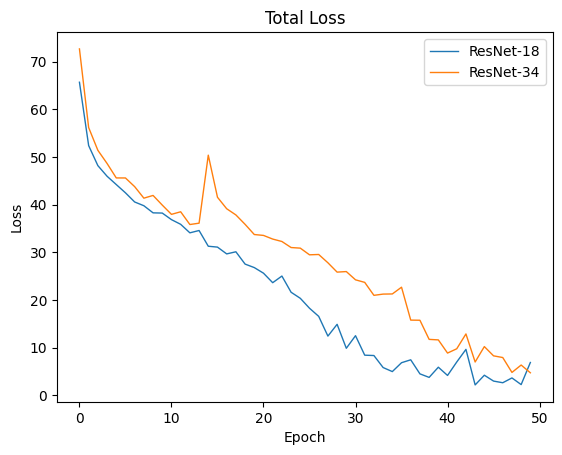

In [12]:
plt.plot(total_loss_18, label='ResNet-18')
plt.plot(total_loss_34, label='ResNet-34')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Total Loss')
plt.legend()
plt.show()


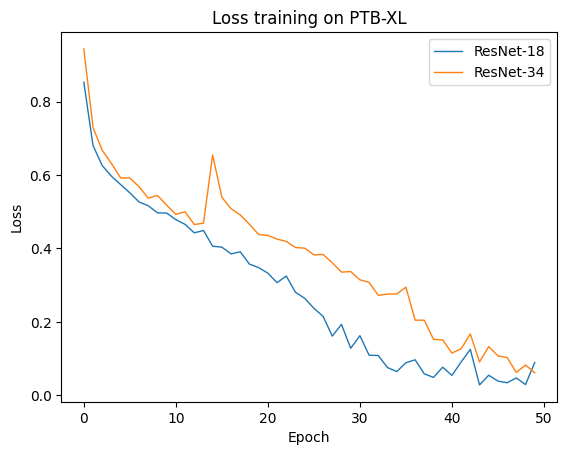

In [13]:
total_loss_18_divided = [loss / 77 for loss in total_loss_18]
total_loss_34_divided = [loss / 77 for loss in total_loss_34]

plt.plot(total_loss_18_divided, label='ResNet-18')
plt.plot(total_loss_34_divided, label='ResNet-34')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss training on PTB-XL')
plt.legend()
plt.show()
